In [85]:
import pandas as pd
import numpy as np

df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df.sample(10)

,Date,Time,State,Group,Unit,Sales
5013,30-Nov-2020,Evening,QLD,Men,9,22500
693,9-Oct-2020,Evening,NT,Men,10,25000
7326,28-Dec-2020,Afternoon,NT,Women,8,20000
958,12-Oct-2020,Evening,SA,Women,13,32500
2471,30-Oct-2020,Evening,SA,Seniors,15,37500
2673,2-Nov-2020,Evening,NSW,Men,14,35000
3846,16-Nov-2020,Afternoon,NSW,Women,23,57500
1568,19-Oct-2020,Evening,QLD,Kids,5,12500
1552,19-Oct-2020,Afternoon,VIC,Kids,40,100000
4303,22-Nov-2020,Afternoon,NT,Seniors,9,22500


## 1. Data Wrangling

### - Check for any missing values or incorrect entries

In [86]:
missing_values = df.isna().sum()
incorrect_entries = df.notna().sum()

print('\nMissing values:', missing_values)
print('\nIncorrect entries:', incorrect_entries)


Missing values: Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Incorrect entries: Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [87]:
incorrect_entries.value_counts()

7560    6
Name: count, dtype: int64

### - Treating incorrect data

In [88]:
df.replace(7560, np.nan, inplace=True)
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

### - Standardization or normalization

In [89]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

sales_data = df['Sales'].values.reshape(-1, 1)
scaler = MinMaxScaler()

normalized_sales_data = scaler.fit_transform(sales_data)
df['Normalized Sales'] = normalized_sales_data

df.sample(10)

,Date,Time,State,Group,Unit,Sales,Normalized Sales
7145,26-Dec-2020,Afternoon,WA,Men,6,15000,0.063492
4726,27-Nov-2020,Evening,NT,Women,8,20000,0.095238
5702,8-Dec-2020,Morning,TAS,Women,5,12500,0.047619
309,4-Oct-2020,Evening,QLD,Men,17,42500,0.238095
2055,25-Oct-2020,Morning,VIC,Seniors,43,107500,0.650794
2770,3-Nov-2020,Evening,TAS,Women,2,5000,0.000000
1503,18-Oct-2020,Morning,TAS,Seniors,8,20000,0.095238
2805,4-Nov-2020,Evening,SA,Men,20,50000,0.285714
7357,28-Dec-2020,Morning,QLD,Men,18,45000,0.253968
1011,13-Oct-2020,Morning,WA,Seniors,14,35000,0.190476


### - Use groupby() function

In [90]:
# Total sales per group
total_sales = df.groupby('Group')['Sales'].sum()

# Average sales per state for each group
average_sales = df.groupby(['Group', 'State'])['Sales'].mean()

# Total units sold by time of day
total_units = df.groupby('Time')['Unit'].sum()

print('\nTotal sales per group:', total_sales)
print('\nAverage sales per state for each group:', average_sales)
print('\nTotal units sold by time of day:', total_units)


Total sales per group: Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64

Average sales per state for each group: Group    State
Kids     NSW      68842.592593
         NT       21111.111111
         QLD      31518.518519
         SA       53759.259259
         TAS      21388.888889
         VIC      97629.629630
         WA       20833.333333
Men      NSW      70453.703704
         NT       21342.592593
         QLD      31083.333333
         SA       54277.777778
         TAS      21324.074074
         VIC      97805.555556
         WA       21305.555556
Seniors  NSW      67361.111111
         NT       20240.740741
         QLD      30333.333333
         SA       54509.259259
         TAS      20925.925926
         VIC      97462.962963
         WA       20416.666667
Women    NSW      71009.259259
         NT       20935.185185
         QLD      30833.333333
         SA       55444.444444
         TAS      20657.407407
  

## 2. Data Analysis

### - Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [91]:
# Descriptive statistics for 'Sales' column
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_std = df['Sales'].std()
sales_mode = df['Sales'].mode()[0]

# Descriptive statistics for 'Unit' column
unit_mean = df['Unit'].mean()
unit_median = df['Unit'].median()
unit_std = df['Unit'].std()
unit_mode = df['Unit'].mode()[0]

print('\nDescriptive statistics for Sales column:', sales_mean, sales_median, sales_std, sales_mode)
print('\nDescriptive statistics for Unit column:', unit_mean, unit_median, unit_std, unit_mode)



Descriptive statistics for Sales column: 45013.5582010582 35000.0 32253.506943966317 22500

Descriptive statistics for Unit column: 18.00542328042328 14.0 12.901402777586455 9


### - Identify the group with the highest and lowest sales based on the data provided.

In [92]:
grouped_sales = df.groupby('Group')['Sales'].sum()

# Highest sales for each group
highest_sales_group = grouped_sales.idxmax()
highest_sales_value = grouped_sales.max()

# Lowest sales for each group
lowest_sales_group = grouped_sales.idxmin()
lowest_sales_value = grouped_sales.min()

print('\nHighest sales for each group:', highest_sales_group)
print('Highest sales value:', highest_sales_value)

print('\nLowest sales for each group:', lowest_sales_group)
print('Lowest sales value:', lowest_sales_value)


Highest sales for each group:  Men
Highest sales value: 85750000

Lowest sales for each group:  Seniors
Lowest sales value: 84037500


### - Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

In [93]:
import pandas as pd


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

weekly_report = df.resample('W').sum()

monthly_report = df.resample('M').sum()

quarterly_report = df.resample('Q').sum()

print("Weekly Report:")
print(weekly_report)

Weekly Report:
                                                         Time  \
Date                                                            
2020-10-04   Morning Morning Morning Morning Afternoon Aft...   
2020-10-11   Morning Morning Morning Morning Afternoon Aft...   
2020-10-18   Morning Morning Morning Morning Afternoon Aft...   
2020-10-25   Morning Morning Morning Morning Afternoon Aft...   
2020-11-01   Morning Morning Morning Morning Afternoon Aft...   
2020-11-08   Morning Morning Morning Morning Afternoon Aft...   
2020-11-15   Morning Morning Morning Morning Afternoon Aft...   
2020-11-22   Morning Morning Morning Morning Afternoon Aft...   
2020-11-29   Morning Morning Morning Morning Afternoon Aft...   
2020-12-06   Morning Morning Morning Morning Afternoon Aft...   
2020-12-13   Morning Morning Morning Morning Afternoon Aft...   
2020-12-20   Morning Morning Morning Morning Afternoon Aft...   
2020-12-27   Morning Morning Morning Morning Afternoon Aft...   
2021-01-03

/var/folders/f9/b1rf60v156n1r74gm8zx6f3c0000gn/T/ipykernel_49344/3848214868.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_report = df.resample('M').sum()
/var/folders/f9/b1rf60v156n1r74gm8zx6f3c0000gn/T/ipykernel_49344/3848214868.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_report = df.resample('Q').sum()


In [94]:
print("Monthly Report:")
print(monthly_report)

Monthly Report:
                                                         Time  \
Date                                                            
2020-10-31   Morning Morning Morning Morning Afternoon Aft...   
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State  \
Date                                                            
2020-10-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-11-30   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group   Unit  \
Date                                                                   
2020-10-31   Kids Men Women Seniors Kids Men Women Seniors...  45716   
2020-11-30   Kids Men Women Seniors Kids Men Women Seniors...  36273   
2020-12-31   Kids Men Women Seniors Kids Men

In [95]:
print("Quarterly Report:")
print(quarterly_report)

Quarterly Report:
                                                         Time  \
Date                                                            
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State  \
Date                                                            
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group    Unit  \
Date                                                                    
2020-12-31   Kids Men Women Seniors Kids Men Women Seniors...  136121   

                Sales  Normalized Sales  
Date                                     
2020-12-31  340302500       1920.650794  


## 3. Data Visualization

### - Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. 

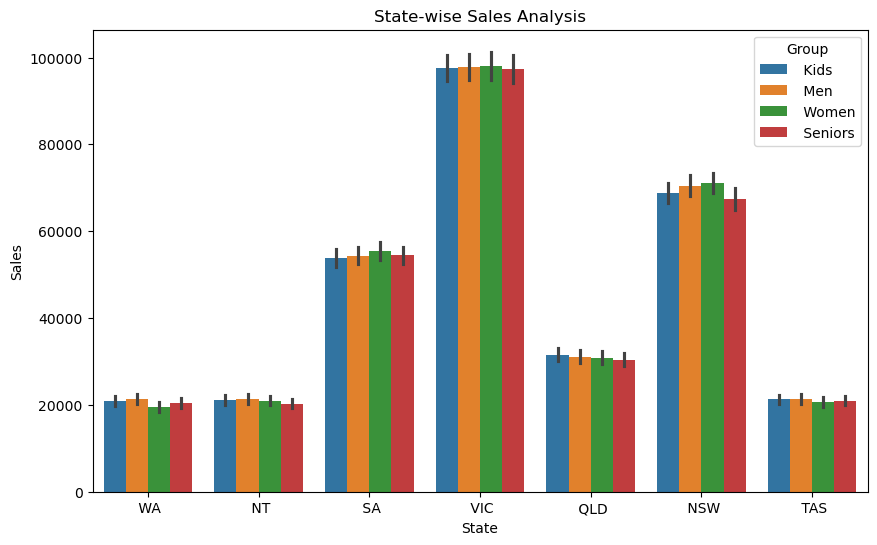

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# State-wise sales analysis
# I use a grouped bar chart to compare sales across these demographic groups within each state.
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales Analysis')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()

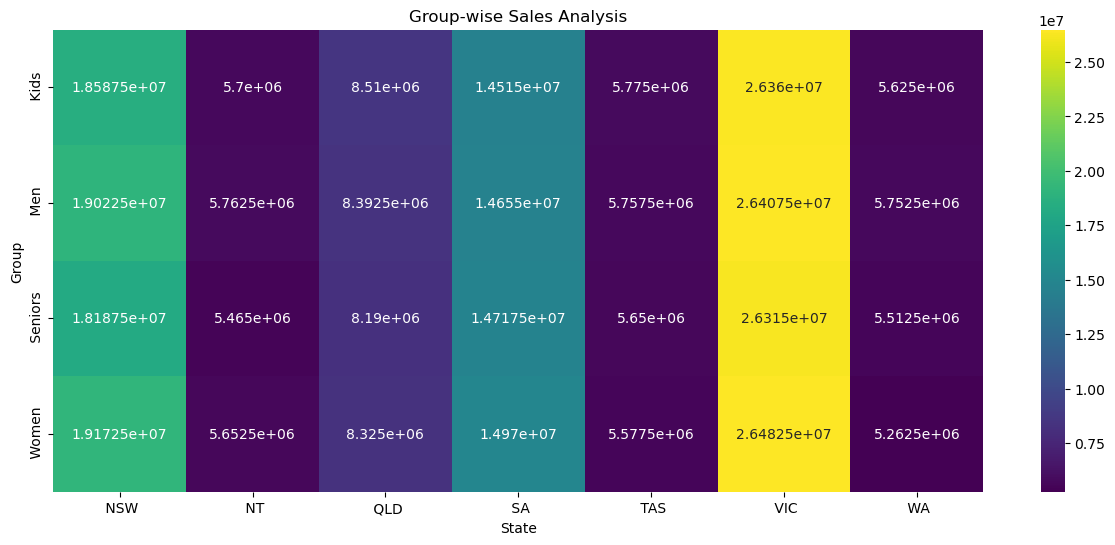

In [97]:
# Group-wise sales analysis
# I use a heatmap to compare sales across states within each demographic group.
plt.figure(figsize=(15, 6))
# sns.heatmap(df.groupby(['Group', 'State'])['Sales'].sum().unstack(), cmap='YlGnBu', annot=True, fmt='g')
sns.heatmap(df.pivot_table(index='Group', columns='State', values='Sales', aggfunc='sum'), cmap='viridis', annot=True, fmt='g')
plt.title('Group-wise Sales Analysis')
plt.xlabel('State')
plt.ylabel('Group')
plt.show()

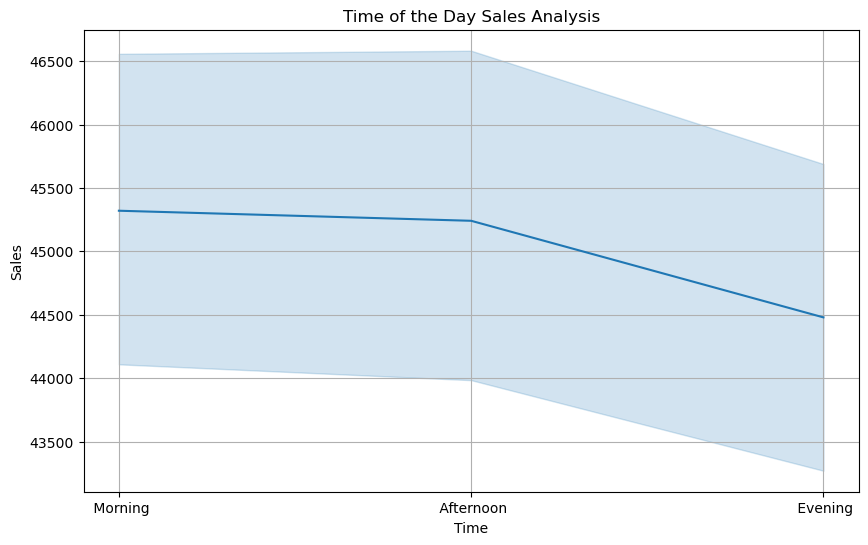

In [98]:
# Time of the day sales analysis
# I use a line plot to visualize the trend of sales over time.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Sales', data=df)
plt.title('Time of the Day Sales Analysis')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## 4. Report Generation

## Data Wrangling
- I used isna() and notna() methods to identify missing values and incorrect entries in the dataset.
- I replaced incorrect entries with NaN values using the replace() method.
- I normalized the 'Sales' column using MinMaxScaler from scikit-learn.
- I performed group-wise analysis to calculate total sales per group, average sales per state for each group, and total units sold by time of day.

## Data Analysis
- I use statistical methods to analyze the data and derive insights from it. Mean, median, mode, standard deviation.
- I use descriptive statistics to summarize the data and understand its distribution.
- I use idxmax() and idxmin() to find the group with the highest and lowest sales.
- I use resampling to aggregate the data into weekly, monthly, and quarterly reports.

## Data Visualization
- I use bar seaborn bar plot to compare sales across demographic groups within each state.
- I use a heatmap to compare sales across states within each demographic group.
- I use a line plot to visualize the trend of sales over time.